# PyFilterBank調査

In [1]:
import pyfilterbank.octbank as oct
import numpy as np
import matplotlib.pyplot as plt

# 信号の作成

[Text(0.5, 0, 'Time[s]'), Text(0, 0.5, 'Amplitude'), Text(0.5, 1.0, 'Data')]

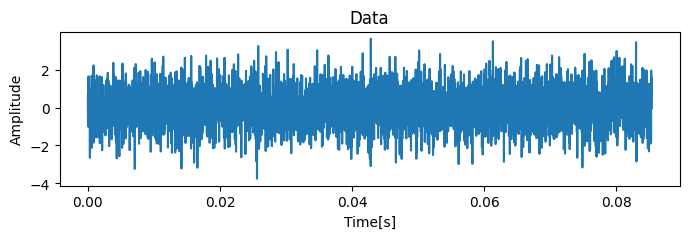

In [2]:
fs = 48000
n = 4096
data = np.random.randn(n)
time = np.arange(n)/fs

_,ax = plt.subplots(figsize=(8,2))
ax.plot(time,data)
ax.set(xlabel='Time[s]',ylabel='Amplitude',title='Data')

# 周波数解析

[Text(0.5, 0, 'Frequency[Hz]'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'power_spec')]

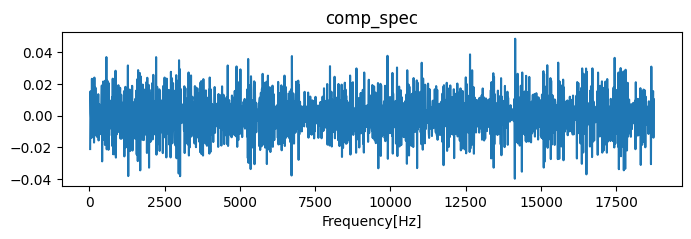

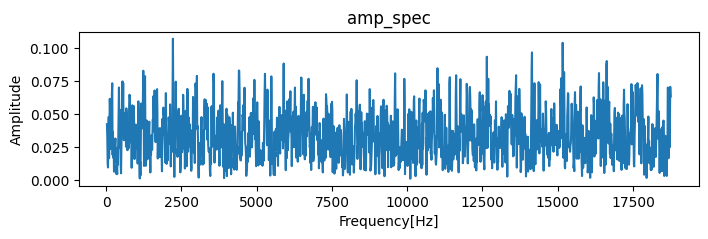

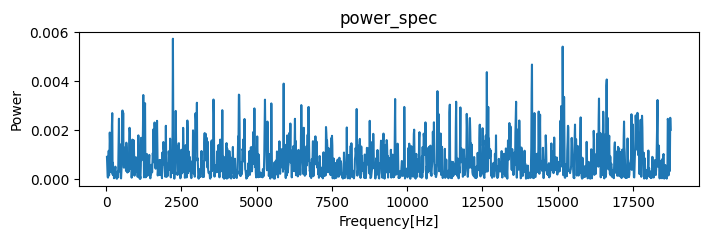

In [3]:
window = np.hanning(n)
n_fft = n
f_range = int(n_fft/2.56)+1
freq = np.fft.rfftfreq(n_fft,1/fs)[:f_range]

windowed_data = data * window

comp_spec = np.fft.rfft(a=windowed_data,n=n_fft,norm='forward')
comp_spec = (comp_spec/np.mean(window))[:f_range]

amp_spec = np.abs(comp_spec)
amp_spec[1:] *= 2

power_spec = np.abs(comp_spec)**2
power_spec[1:] *= 2

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],np.real(comp_spec)[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='',title='comp_spec')

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],amp_spec[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='Amplitude',title='amp_spec')

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],power_spec[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='Power',title='power_spec')

# 1/3オクターブ解析

sum level 1.030241313375224 -0.0008686323961498936


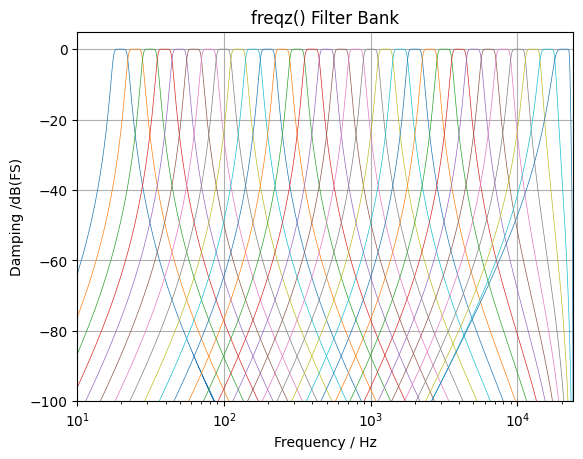

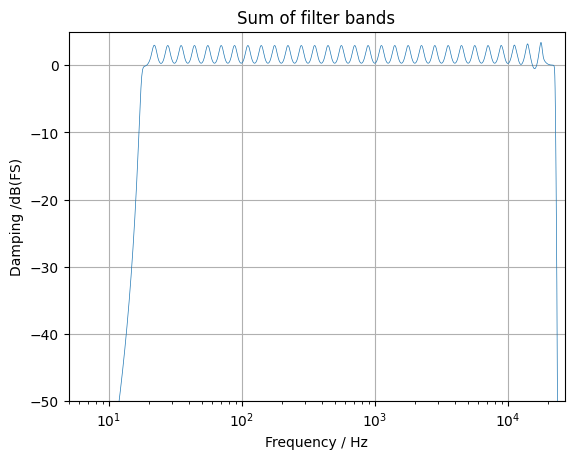

In [15]:
ofb = oct.FractionalOctaveFilterbank(sample_rate=fs,
                                     order=4,
                                     nth_oct=3,
                                     norm_freq=1000,
                                     start_band=-17,
                                     end_band=13
                                     )

x, y, f, Y = oct.freqz(ofb=ofb,length_sec=4)

In [16]:
np.set_printoptions(suppress=True)
ofb.center_frequencies

array([   19.6862664 ,    24.80314144,    31.25      ,    39.37253281,
          49.60628287,    62.5       ,    78.74506562,    99.21256575,
         125.        ,   157.49013124,   198.4251315 ,   250.        ,
         314.98026247,   396.85026299,   500.        ,   629.96052495,
         793.70052598,  1000.        ,  1259.92104989,  1587.40105197,
        2000.        ,  2519.84209979,  3174.80210394,  4000.        ,
        5039.68419958,  6349.60420787,  8000.        , 10079.36839916,
       12699.20841575, 16000.        , 20158.73679832])

In [31]:
2**(16)


65536

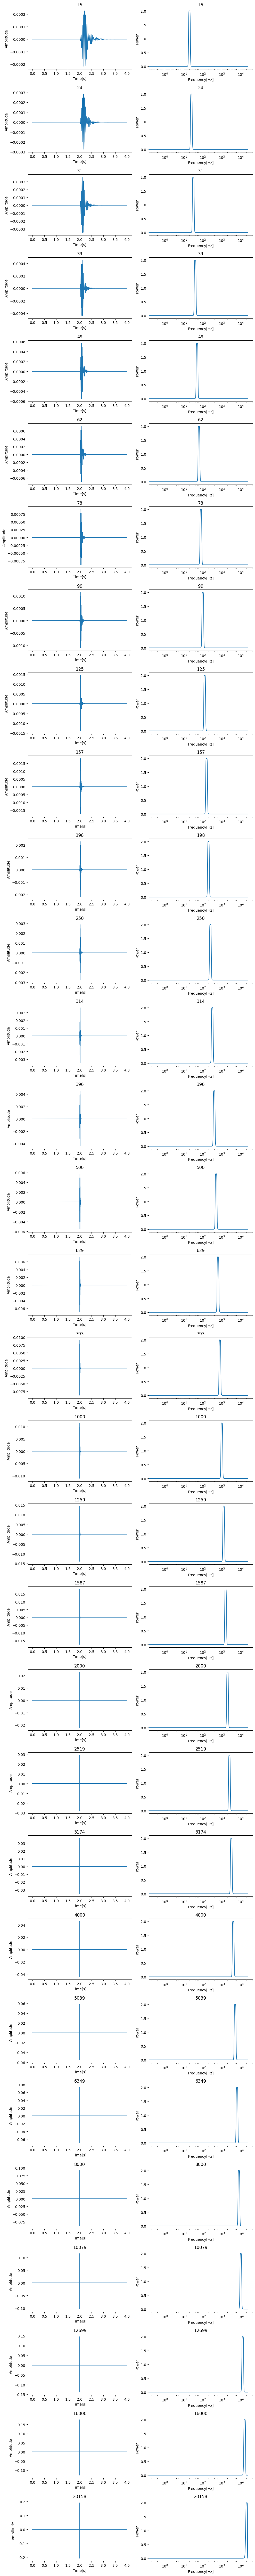

In [36]:
fig = plt.figure(figsize=(10,100))
t = np.arange(y.shape[0])/fs
for i, _y in enumerate(y.T):
    ax = fig.add_subplot(len(y.T),2,i*2+1)
    ax.plot(t,_y)
    ax.set(xlabel='Time[s]',ylabel='Amplitude',title=f'{int(ofb.center_frequencies[i])}')

    ax = fig.add_subplot(len(y.T),2,i*2+2)
    _comp_spec = np.fft.rfft(a=_y)
    _power_spec = np.abs(_comp_spec)**2
    _power_spec[1:] *= 2
    
    _freq = np.fft.rfftfreq(n=len(_y),d=1/fs)

    ax.plot(_freq,_power_spec)
    ax.set(xscale='log',xlabel='Frequency[Hz]',ylabel='Power',title=f'{int(ofb.center_frequencies[i])}')
plt.tight_layout()


# フィルタ処理

In [37]:
y,stats = ofb.filter(data)

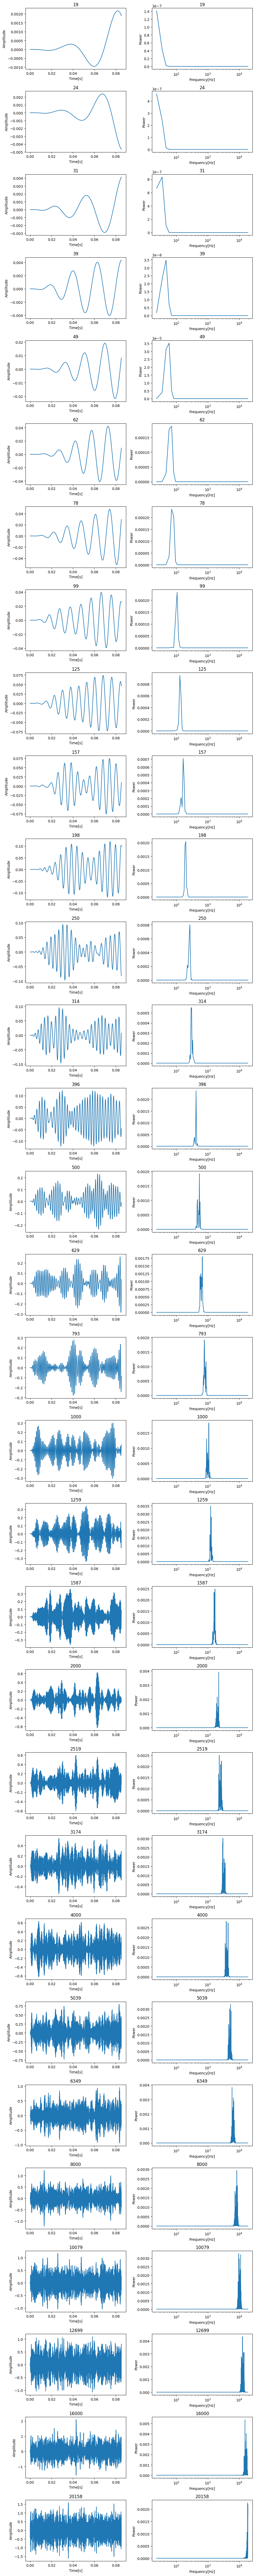

In [38]:
fig = plt.figure(figsize=(10,100))
t = np.arange(y.shape[0])/fs
for i, _y in enumerate(y.T):
    ax = fig.add_subplot(len(y.T),2,i*2+1)
    ax.plot(t,_y)
    ax.set(xlabel='Time[s]',ylabel='Amplitude',title=f'{int(ofb.center_frequencies[i])}')

    ax = fig.add_subplot(len(y.T),2,i*2+2)
    _y = _y * window

    comp_spec = np.fft.rfft(a=_y,n=n_fft,norm='forward')
    comp_spec = (comp_spec/np.mean(window))[:f_range]    

    power_spec = np.abs(comp_spec)**2
    power_spec[1:] *= 2
    
    ax.plot(freq[2:],power_spec[2:])
    ax.set(xscale='log',xlabel='Frequency[Hz]',ylabel='Power',title=f'{int(ofb.center_frequencies[i])}')
plt.tight_layout()

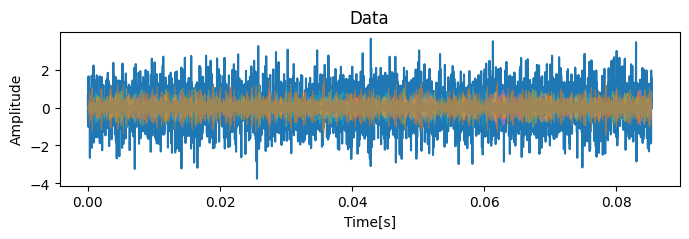

In [39]:
_,ax = plt.subplots(figsize=(8,2))
ax.plot(time,data)
ax.set(xlabel='Time[s]',ylabel='Amplitude',title='Data')

ax.plot(time,y,linewidth=0.5,alpha=0.5)

[Text(0.5, 0, 'Frequency[Hz]'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'power_spec'),
 None]

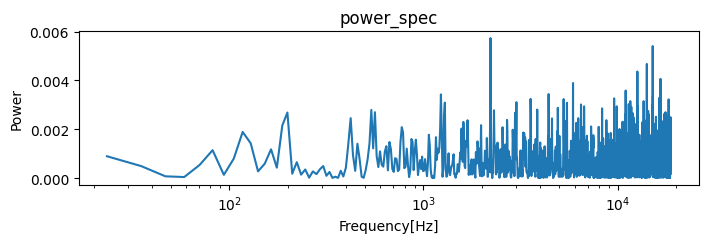

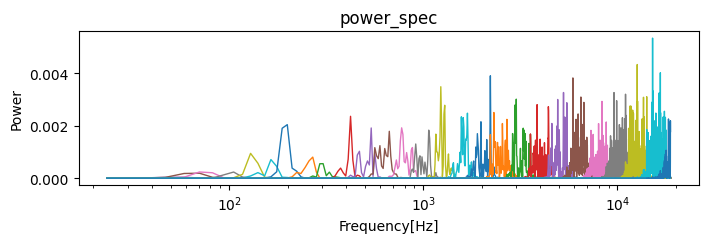

In [40]:
windowed_data = data * window

comp_spec = np.fft.rfft(a=windowed_data,n=n_fft,norm='forward')
comp_spec = (comp_spec/np.mean(window))[:f_range]

power_spec = np.abs(comp_spec)**2
power_spec[1:] *= 2

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],power_spec[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='Power',title='power_spec',xscale='log')

_,ax = plt.subplots(figsize=(8,2))
for _y in y.T:
    _y = _y * window

    comp_spec = np.fft.rfft(a=_y,n=n_fft,norm='forward')
    comp_spec = (comp_spec/np.mean(window))[:f_range]    

    power_spec = np.abs(comp_spec)**2
    power_spec[1:] *= 2
    
    ax.plot(freq[2:],power_spec[2:],linewidth=1,alpha=1)
ax.set(xlabel='Frequency[Hz]',ylabel='Power',title='power_spec',xscale='log')